### 1.

A partir del dataset mnist (tf.keras.datasets.cifar10.load_data()), realiza una clasificación usando:

** Las imágenes son a color, es decir, tienen 3 dimensiones (rgb). Para este problema, antes de empezar, transforma las imágenes a blanco y negro para que tengan 1 sola dimensión de profundidad **. 

1. Una CNN con:
    - 1 capa convolutiva con 8 neuronas
    - 1 MaxPool quedando las dimensiones de la imagen a la mitad
    - 1 dropout 0.25
    - 1 Flatten
    - 1 dense con 32 neuronas
    - 1 dense con 10 (salida)

2. Una CNN con:
    - 1 capa convolutiva con 8 neuronas
    - 1 MaxPool quedando las dimensiones de la imagen a la mitad
    - 1 dropout 0.25
    - 1 Flatten
    - 1 dense con 16 neuronas
    - 1 dense con 32 neuronas
    - 1 dense con 10 (salida)

¿ Cuál ha dado mejor resultado?

Para compilar el modelo, usa:

In [1]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

NameError: name 'model' is not defined

In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
#Importamos el dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [3]:
#Normalizamos las imagenes
train_images, test_images = train_images / 255.0, test_images / 255.0

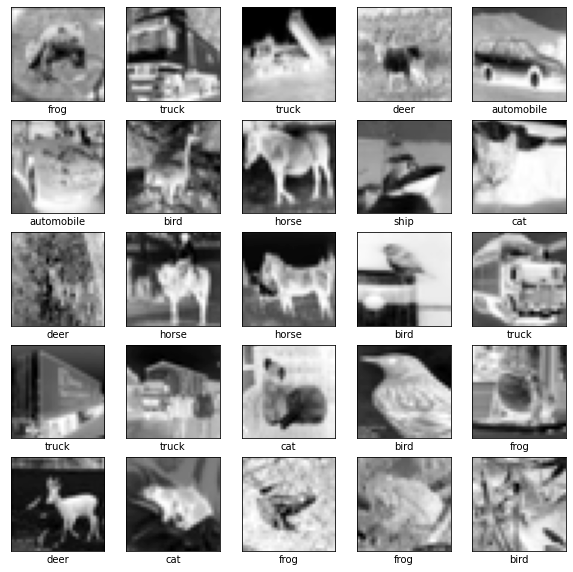

In [4]:
#Cambiamos las imagenes a un solo color
train_images = tf.image.rgb_to_grayscale(train_images)
test_images = tf.image.rgb_to_grayscale(test_images)

#Asignamos las clases
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

#Mostramos las 25 primeras imagenes de train
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

### Opción 1.1

1. Una CNN con:
    - 1 capa convolutiva con 8 neuronas
    - 1 MaxPool quedando las dimensiones de la imagen a la mitad
    - 1 dropout 0.25
    - 1 Flatten
    - 1 dense con 32 neuronas
    - 1 dense con 10 (salida)

In [5]:
train_images[0].shape

TensorShape([32, 32, 1])

In [6]:
# Generamos el modelo y añadimos capas
model = models.Sequential()
model.add(layers.Conv2D(filters=8, #ESTO SON NEURONAS??
                        kernel_size=(2),
                        input_shape=(32, 32, 1),
                        padding='same'))
model.add(layers.MaxPooling2D()) # Maxpool quedando las imagenes a la mitad (en dimesiones)
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 8)         40        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 8)         0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 8)         0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                65568     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 65,938
Trainable params: 65,938
Non-trainable params: 0
____________________________________________________

In [7]:
# Compilamos el modelo - añadimos otros parametros para su correcto funcionamiento/medición
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
# Entrenamos el modelo con 10 epochs - ¿¿¿¿EPOCHS????
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 10s 6ms/step - loss: 8.4814 - accuracy: 0.0990
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 13.5461 - accuracy: 0.1009
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 13.6009 - accuracy: 0.1002
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 13.6034 - accuracy: 0.1015
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 13.5573 - accuracy: 0.0996
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 13.5952 - accuracy: 0.1001
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 13.5715 - accuracy: 0.1009
Epoch 8/10
1563/1563 [==============================] - 12s 8ms/step - loss: 13.6611 - accuracy: 0.0993
Epoch 9/10
1563/1563 [==============================] - 16s 10ms/step - loss: 8.9029 - accuracy: 0.1004
Epoch 10/10
1563/1563 [==============================] - 15s 10ms/step 

In [9]:
# Hacemos una medición del modelo - ¿¿¿¿VERBOSE????
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 2.3026 - accuracy: 0.1000

Test accuracy: 0.10000000149011612


### Opción 1.2

2. Una CNN con:
    - 1 capa convolutiva con 8 neuronas
    - 1 MaxPool quedando las dimensiones de la imagen a la mitad
    - 1 dropout 0.25
    - 1 Flatten
    - 1 dense con 16 neuronas
    - 1 dense con 32 neuronas
    - 1 dense con 10 (salida)

In [10]:
# Generamos el modelo y añadimos capas
model = models.Sequential()
model.add(layers.Conv2D(filters=8, #ESTO SON NEURONAS??
                        kernel_size=(2),
                        input_shape=(32, 32, 1),
                        padding='same'))
model.add(layers.MaxPooling2D()) # Maxpool quedando las imagenes a la mitad (en dimesiones)
model.add(layers.Dropout(0.25))
model.add(layers.Flatten()) # Por qué si quito Flatten no funciona????
model.add(layers.Dense(16, activation='softmax'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 8)         40        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 8)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 8)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                32784     
_________________________________________________________________
dense_3 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_4 (Dense)              (None, 10)               

In [11]:
# Compilamos el modelo - añadimos otros parametros para su correcto funcionamiento/medición
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
# Entrenamos el modelo con 10 epochs - ¿¿¿¿EPOCHS????
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 11s 7ms/step - loss: 5.1862 - accuracy: 0.1361
Epoch 2/10
1563/1563 [==============================] - 16s 10ms/step - loss: 4.3909 - accuracy: 0.1092
Epoch 3/10
1563/1563 [==============================] - 13s 8ms/step - loss: 2.3032 - accuracy: 0.1001
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 2.3026 - accuracy: 0.0998
Epoch 5/10
1563/1563 [==============================] - 12s 7ms/step - loss: 2.3026 - accuracy: 0.0969
Epoch 6/10
1563/1563 [==============================] - 10s 6ms/step - loss: 2.3026 - accuracy: 0.0999
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 2.3026 - accuracy: 0.0991
Epoch 8/10
1563/1563 [==============================] - 9s 6ms/step - loss: 2.3026 - accuracy: 0.1021
Epoch 9/10
1563/1563 [==============================] - 9s 6ms/step - loss: 2.3203 - accuracy: 0.0987
Epoch 10/10
1563/1563 [==============================] - 10s 6ms/step - loss

In [13]:
# Hacemos una medición del modelo - ¿¿¿¿VERBOSE????
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 2.3026 - accuracy: 0.1000

Test accuracy: 0.10000000149011612


### 2.

**BONUS: Entrena la red neuronal 1 pero esta vez con las imágenes a color.**

In [15]:
# Cargamos el dataset de nuevo con las imagenes a color
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [16]:
#Normalizamos las imagenes
train_images, test_images = train_images / 255.0, test_images / 255.0

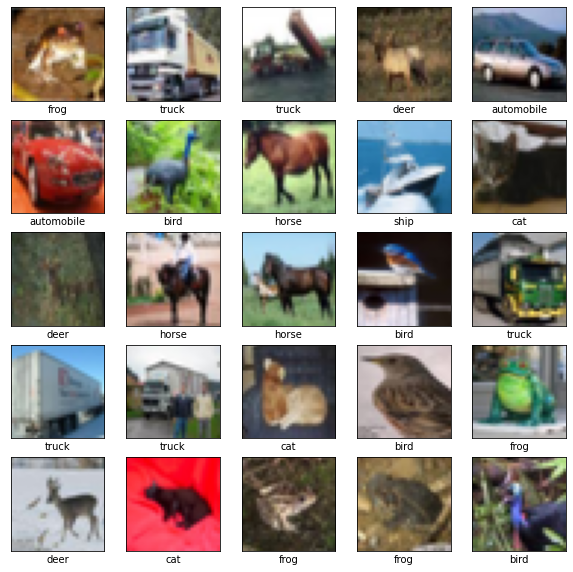

In [17]:
#Asignamos las clases
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

#Mostramos las 25 primeras imagenes de train
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

Modelo 1

In [18]:
# Generamos el modelo y añadimos capas
model = models.Sequential()
model.add(layers.Conv2D(filters=8, #ESTO SON NEURONAS??
                        kernel_size=(2),
                        input_shape=(32, 32, 3),
                        padding='same'))
model.add(layers.MaxPooling2D()) # Maxpool quedando las imagenes a la mitad (en dimesiones)
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 8)         104       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 8)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 8)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 32)                65568     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                330       
Total params: 66,002
Trainable params: 66,002
Non-trainable params: 0
__________________________________________________

In [19]:
# Compilamos el modelo - añadimos otros parametros para su correcto funcionamiento/medición
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
# Entrenamos el modelo con 10 epochs - ¿¿¿¿EPOCHS????
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 10s 6ms/step - loss: 4.2924 - accuracy: 0.1222
Epoch 2/10
1563/1563 [==============================] - 12s 8ms/step - loss: 3.8654 - accuracy: 0.1183
Epoch 3/10
1563/1563 [==============================] - 12s 8ms/step - loss: 3.8551 - accuracy: 0.0997
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 3.8214 - accuracy: 0.0995
Epoch 5/10
1563/1563 [==============================] - 10s 6ms/step - loss: 3.8406 - accuracy: 0.1071
Epoch 6/10
1563/1563 [==============================] - 15s 10ms/step - loss: 3.8452 - accuracy: 0.1101
Epoch 7/10
1563/1563 [==============================] - 17s 11ms/step - loss: 3.8032 - accuracy: 0.1042
Epoch 8/10
1563/1563 [==============================] - 17s 11ms/step - loss: 3.7943 - accuracy: 0.1279
Epoch 9/10
1563/1563 [==============================] - 12s 8ms/step - loss: 3.8736 - accuracy: 0.1242
Epoch 10/10
1563/1563 [==============================] - 9s 6ms/step - 

In [21]:
# Hacemos una medición del modelo - ¿¿¿¿VERBOSE????
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 3.8090 - accuracy: 0.1465

Test accuracy: 0.14650000631809235


Modelo 2

In [22]:
# Generamos el modelo y añadimos capas
model = models.Sequential()
model.add(layers.Conv2D(filters=8, #ESTO SON NEURONAS??
                        kernel_size=(2),
                        input_shape=(32, 32, 3),
                        padding='same'))
model.add(layers.MaxPooling2D()) # Maxpool quedando las imagenes a la mitad (en dimesiones)
model.add(layers.Dropout(0.25))
model.add(layers.Flatten()) # Por qué si quito Flatten no funciona????
model.add(layers.Dense(16, activation='softmax'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 8)         104       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 8)         0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 16, 8)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 16)                32784     
_________________________________________________________________
dense_8 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_9 (Dense)              (None, 10)               

In [23]:
# Compilamos el modelo - añadimos otros parametros para su correcto funcionamiento/medición
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [24]:
# Entrenamos el modelo con 10 epochs - ¿¿¿¿EPOCHS????
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 17s 10ms/step - loss: 6.2336 - accuracy: 0.1137
Epoch 2/10
1563/1563 [==============================] - 10s 6ms/step - loss: 2.3040 - accuracy: 0.1009
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 2.3058 - accuracy: 0.0990
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 2.3035 - accuracy: 0.1006
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 2.3030 - accuracy: 0.0990
Epoch 6/10
1563/1563 [==============================] - 11s 7ms/step - loss: 2.3026 - accuracy: 0.1001
Epoch 7/10
1563/1563 [==============================] - 15s 9ms/step - loss: 2.3026 - accuracy: 0.0998
Epoch 8/10
1563/1563 [==============================] - 9s 6ms/step - loss: 2.3026 - accuracy: 0.0999
Epoch 9/10
1563/1563 [==============================] - 9s 6ms/step - loss: 2.3026 - accuracy: 0.1016
Epoch 10/10
1563/1563 [==============================] - 10s 6ms/step - loss:

In [25]:
# Hacemos una medición del modelo - ¿¿¿¿VERBOSE????
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 2.3026 - accuracy: 0.1000

Test accuracy: 0.10000000149011612
